# This sample is used to demonstrate the integration of DLPFC#151507, #151508, #151675, and #151676 from two donors.

### Step 0：Since Jupyter Notebook does not automatically release GPU memory after running, please run this code to clear all processes occupying GPU memory before the FIRST time starting execution.¶

In [1]:
!fuser -v /dev/nvidia* |awk '{for(i=1;i<=NF;i++)print "kill -9 " $i;}' | sh

                     USER        PID ACCESS COMMAND
/dev/nvidia-uvm:     root      mount /dev/nvidia-uvm
                     root      F...m python
/dev/nvidia-uvm-tools:
                     root      mount /dev/nvidia-uvm-tools
/dev/nvidia0:        root      mount /dev/nvidia0
                     root      F...m python
/dev/nvidiactl:      root      mount /dev/nvidiactl
                     root      F...m python
sh: 1: kill: Illegal number: kernel
sh: 2: kill: Illegal number: 595433kernelkernel
sh: 3: kill: Illegal number: 595433kernel


### Step 1:Load packages

In [2]:
import argparse
import os
os.chdir('/remote-home/13186919777/home/STAIG-test')
import warnings
warnings.filterwarnings('ignore')
import random
import yaml
from yaml import SafeLoader
import torch
from staig.adata_processing import LoadBatch10xAdata
import numpy as np
from staig.staig import STAIG
import pandas as pd
import scanpy as sc
from sklearn.cluster import KMeans

### Step2: Load data and train

In [3]:

file_fold = './Dataset'


args = argparse.Namespace(
    dataset='DLPFC',
    slide='integration_vertical07087576',
    config='train_img_config.yaml',
    label=True,
    filelist=['151507', '151508','151675','151676']
)

config = yaml.load(open(args.config), Loader=SafeLoader)[str(args.slide)]
slide_path = os.path.join(file_fold, args.dataset)

torch.manual_seed(config['seed'])
np.random.seed(config['seed'])
if torch.cuda.is_available():
    torch.cuda.manual_seed(config['seed'])
    torch.cuda.manual_seed_all(config['seed'])
    torch.backends.cudnn.deterministic = True
    torch.backends.cudnn.benchmark = False
random.seed(12345)
os.environ['CUBLAS_WORKSPACE_CONFIG'] = ':4096:8' 
torch.use_deterministic_algorithms(True)
data = LoadBatch10xAdata(dataset_path=slide_path,file_list = args.filelist,n_neighbors=config['num_neigh'],n_top_genes=config['num_gene'],image_emb=True, label = args.label).run()



now load: 151507
151507 load label done
151507 filter NA done
151507 load img embedding done
151507 build local graph done
151507 added to list
now load: 151508
151508 load label done
151508 filter NA done
151508 load img embedding done
151508 build local graph done
151508 added to list
now load: 151675
151675 load label done
151675 filter NA done
151675 load img embedding done
151675 build local graph done
151675 added to list
now load: 151676
151676 load label done
151676 filter NA done
151676 load img embedding done
151676 build local graph done
151676 added to list
load all slices done
merge done


Calculating edge_probabilities: 100%|██████████| 15599/15599 [00:00<00:00, 21795.62it/s]

merge adata load done


In [4]:
config = yaml.load(open(args.config), Loader=SafeLoader)[str(args.slide)]
staig = STAIG(args=args,config=config,single=True,refine=False)    
staig.adata = data
staig.train()
staig.eva()

=== prepare for training ===
Consider intra slice
=== train ===


100%|██████████| [14:41<00:00,  2.20s/it]


=== load ===
[[-1.53678118 -0.07105263 -0.14164668 ... -0.04456893 -1.08013759
  -0.00496242]
 [ 1.2179606   0.02098684  0.16122131 ...  0.31686941  0.43648753
   0.53885828]
 [-2.71347275 -0.13169531 -0.19961814 ... -0.2234409  -1.80795271
   0.06368502]
 ...
 [-3.91552599 -0.08201901 -0.51183149 ... -0.97285224 -1.58050898
  -1.5644538 ]
 [-1.58376036  0.03257819 -0.27565494 ... -0.65220793 -0.28383118
  -1.15037249]
 [-2.28291441 -0.19613146 -0.01015718 ...  0.18885774 -1.9393481
   0.76359424]]
embedding generated, go clustering


### Step 4: Clustering

In [5]:
staig.cluster(args.label)

fitting ...
  |                                                                      |   0%

  |======================================================================| 100%
calculate metric ARI
ARI: 0.5178307877280774
NMI: 0.6154139166815598
BatchKL= [0.33022781]
Median ILISI: 2.95


### Step 5: Show umap

start umap


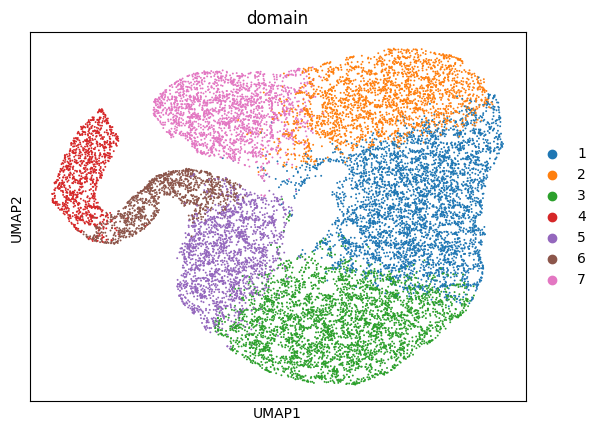

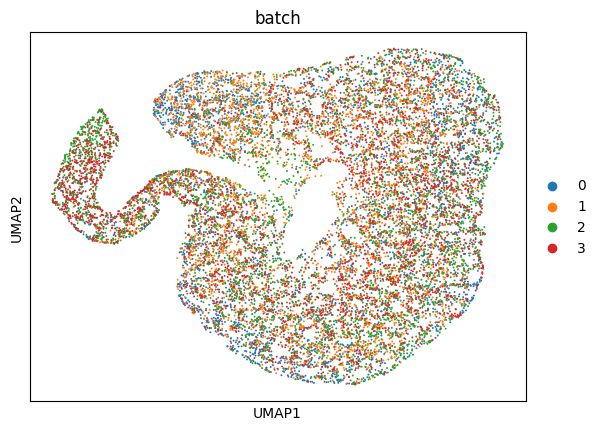

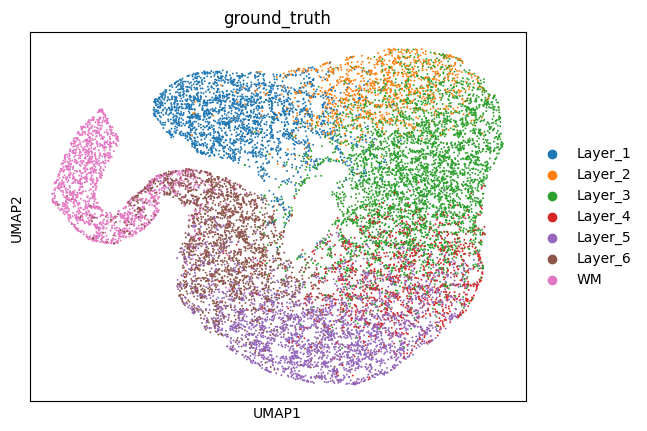

In [6]:
staig.draw_umap()